# Isolation Forest


In [2]:
import numpy as np 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler 
import matplotlib 
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from shared_modules.kmeans_graph_utils import elbow, silhouette, dendrogram
# Check the Matplotlib Version 
print ("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 3.0.3


C:\Users\mark\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mark\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


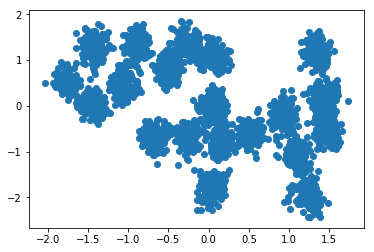

In [3]:
import pandas as pd

weather_df = pd.read_csv('a1.txt', delim_whitespace = True)
#weather_df.iloc[:,0]
##weather_df
mat = StandardScaler().fit_transform(weather_df);
plt.scatter(mat[:,0],mat[:,1])

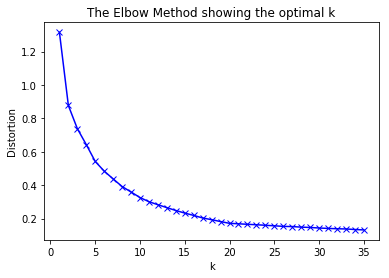

leaving elbow


In [12]:
# Now lets plot the elbow
elbow(mat)

In [51]:
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

db = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.009), max_features=1.0,bootstrap=False, random_state=42)
#mat = weather_df.values
db.fit(mat)

pred = db.predict(mat)

print("mat")
print(mat)
print("pred")
print(pred)
outliers=[]
for num, val in enumerate(pred):
    if val==-1:
        outliers.append(num)
        
        
print("outliers")
print(outliers)


C:\Users\mark\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


mat
[[ 0.99284829 -1.04382049]
 [ 1.02499375 -1.00803847]
 [ 1.12114263 -1.06027499]
 ...
 [-1.52967967  1.09160837]
 [-1.5267469   1.11015233]
 [-1.46216843  1.39157657]]
pred
[1 1 1 ... 1 1 1]
outliers
[1357, 1362, 1363, 1365, 1391, 1403, 1407, 1418, 1421, 1430, 1479, 1486, 1549, 1593, 1618, 1652, 1655, 1677, 1713, 1738, 1773, 1775, 1792, 2747, 2853, 2869, 2870]


C:\Users\mark\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


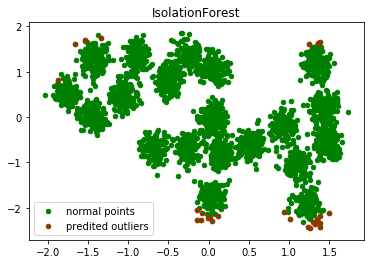

number of outliers  27


In [52]:
plt.title("IsolationForest")
#plt.contourf( mat, cmap=plt.cm.Blues_r)
b1 = plt.scatter(mat[:,0], mat[:,1], s=20, c= 'green', label= "normal points")
outlier_index=list(outliers)
b1 = plt.scatter(mat[outlier_index,0], mat[outlier_index,1],
                c='green', s=20, edgecolor="red", label="predited outliers")
plt.legend(loc="lower left")
plt.show()
print("number of outliers ", len(outliers))